# Convolutional Neural Network

#### Objective(s):

This activity aims to introduce how to build a convolutional neural network

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network
* Evaluate the accuracy and loss of the model using convolutional neural network

#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'keras'

* Shuffle the data
* Split the data into train and test sets

In [ ]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 [==============================] - 7s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Check the image size

In [ ]:

x_train[444].shape

(32, 32, 3)

Visualize one of the images

[9]


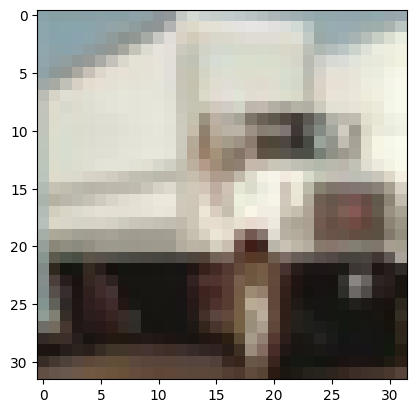

In [ ]:
print(y_train[444])
plt.imshow(x_train[444]);

In [ ]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [ ]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Convert to float and scale the datasets

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential

In [ ]:

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 32)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                        

* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

In [ ]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 32s 20ms/step - loss: 1.6891 - accuracy: 0.3895 - val_loss: 1.3832 - val_accuracy: 0.5055
Epoch 2/15
1563/1563 [==============================] - 32s 21ms/step - loss: 1.4301 - accuracy: 0.4867 - val_loss: 1.2729 - val_accuracy: 0.5445
Epoch 3/15
1563/1563 [==============================] - 31s 20ms/step - loss: 1.3495 - accuracy: 0.5216 - val_loss: 1.2852 - val_accuracy: 0.5420
Epoch 4/15
1563/1563 [==============================] - 31s 20ms/step - loss: 1.2991 - accuracy: 0.5430 - val_loss: 1.2123 - val_accuracy: 0.5727
Epoch 5/15
1563/1563 [==============================] - 32s 20ms/step - loss: 1.2670 - accuracy: 0.5560 - val_loss: 1.1740 - val_accuracy: 0.5921
Epoch 6/15
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2493 - accuracy: 0.5650 - val_loss: 1.1395 - val_accuracy: 0.6043
Epoch 7/15
1563/1563 [==============================] - 31s 20ms/step - loss: 1.2390 - accuracy: 0.5748 - val_loss: 1.1846 -

#### Supplementary Activity

* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Use strides of 1 for all convolutional layers.

* Write the number of parameters of your model  and compare it to the previous model

* Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

* Use different structures and run times, and see how accurate your model can be.

In [ ]:
# Build a more complicated model with the following pattern: Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification
# Use strides of 1 for all convolutional layers.

model_2 = Sequential()

## 5x5 convolution with 2x2 stride and 32 filters
model_2.add(Conv2D(32, (5, 5), strides = (1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_2.add(Conv2D(32, (5, 5), strides = (1,1)))
model_2.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

## Add 3x3 convolution with 1x1 stride and 32 filters
model_2.add(Conv2D(32, (3, 3), strides = (1,1), padding='same'))
model_2.add(Activation('relu'))

## Another 3x3 convolution with 1x1 stride and 32 filters
model_2.add(Conv2D(32, (3, 3), strides = (1,1), padding='same'))
model_2.add(Activation('relu'))

## 2x2 max pooling reduces to 2 x 2 x 32
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

## Flatten turns 2x2x32 into 512x1
model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 activation_4 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 activation_5 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 32)        0         
                                                      

In [ ]:
# Write the number of parameters of your model and compare it to the previous model

print('Total params of model_1:', model_1.count_params())
print('Total params of model_2:', model_2.count_params())

Total params of model_1: 181162
Total params of model_2: 855018


In [ ]:
# Train it for 5 epochs.

batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history_2 = model_2.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=5,
                      validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 313s 199ms/step - loss: 1.6870 - accuracy: 0.3853 - val_loss: 1.3562 - val_accuracy: 0.5102
Epoch 2/5
1563/1563 [==============================] - 321s 205ms/step - loss: 1.3125 - accuracy: 0.5315 - val_loss: 1.3249 - val_accuracy: 0.5333
Epoch 3/5
1563/1563 [==============================] - 315s 202ms/step - loss: 1.1704 - accuracy: 0.5890 - val_loss: 1.1281 - val_accuracy: 0.6042
Epoch 4/5
1563/1563 [==============================] - 314s 201ms/step - loss: 1.0977 - accuracy: 0.6182 - val_loss: 1.1718 - val_accuracy: 0.5808
Epoch 5/5
1563/1563 [==============================] - 306s 196ms/step - loss: 1.0613 - accuracy: 0.6334 - val_loss: 1.0169 - val_accuracy: 0.6460


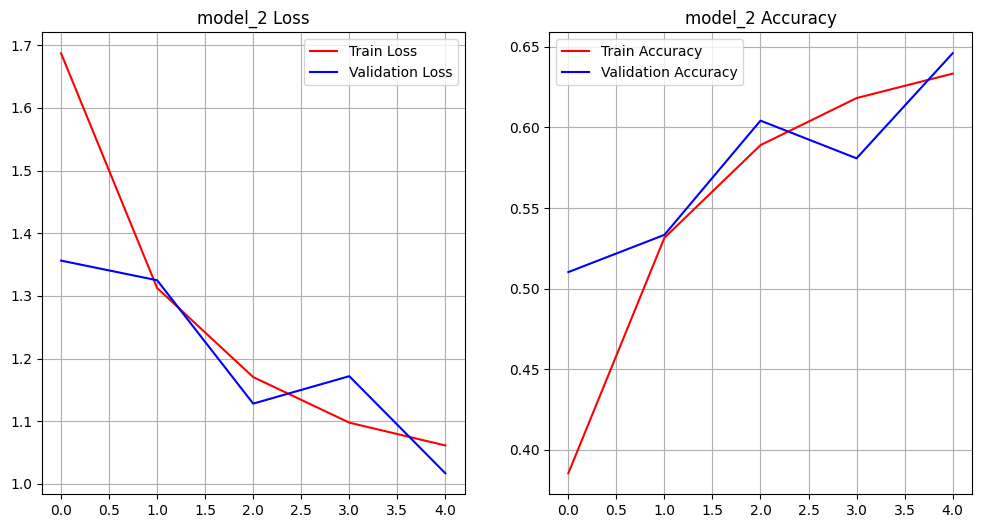

In [ ]:
# Compare the training time, loss and accuracy numbers (on both the training and validation sets)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history_2.history["loss"],'r', label="Train Loss")
ax.plot(history_2.history["val_loss"],'b', label="Validation Loss")
ax.legend()
ax.set_title('model_2 Loss')
ax.grid(True)

ax = fig.add_subplot(1, 2, 2)
ax.plot(history_2.history["accuracy"],'r', label="Train Accuracy")
ax.plot(history_2.history["val_accuracy"],'b', label="Validation Accuracy")
ax.legend()
ax.set_title('model_2 Accuracy')
ax.grid(True)

> The loss and accuracy have certainly improved compared to model_1, however the runtime is significantly longer as well. From **9mins** of training time for model_1 to **28mins** of training for model_2. And this is just for an increase of `0.05%` accuracy.

In [ ]:
# Use different structures and run times, and see how accurate your model can be.

model_3 = Sequential()

model_3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_3.add(Conv2D(64, (3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(128, (3, 3), activation='relu'))
model_3.add(Conv2D(256, (3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())
model_3.add(Dense(512, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(10, activation='softmax'))

# Compile the model
model_3.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# Train the model
history_3 = model_3.fit(x_train, y_train,
                      batch_size=64,
                      epochs=5,
                      validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 503s 642ms/step - loss: 1.5199 - accuracy: 0.4450 - val_loss: 1.1349 - val_accuracy: 0.5971
Epoch 2/5
782/782 [==============================] - 503s 643ms/step - loss: 1.0840 - accuracy: 0.6169 - val_loss: 0.9467 - val_accuracy: 0.6625
Epoch 3/5
782/782 [==============================] - 501s 641ms/step - loss: 0.8920 - accuracy: 0.6856 - val_loss: 0.8024 - val_accuracy: 0.7215
Epoch 4/5
782/782 [==============================] - 500s 640ms/step - loss: 0.7782 - accuracy: 0.7286 - val_loss: 0.7222 - val_accuracy: 0.7481
Epoch 5/5
782/782 [==============================] - 500s 640ms/step - loss: 0.7053 - accuracy: 0.7526 - val_loss: 0.6860 - val_accuracy: 0.7707


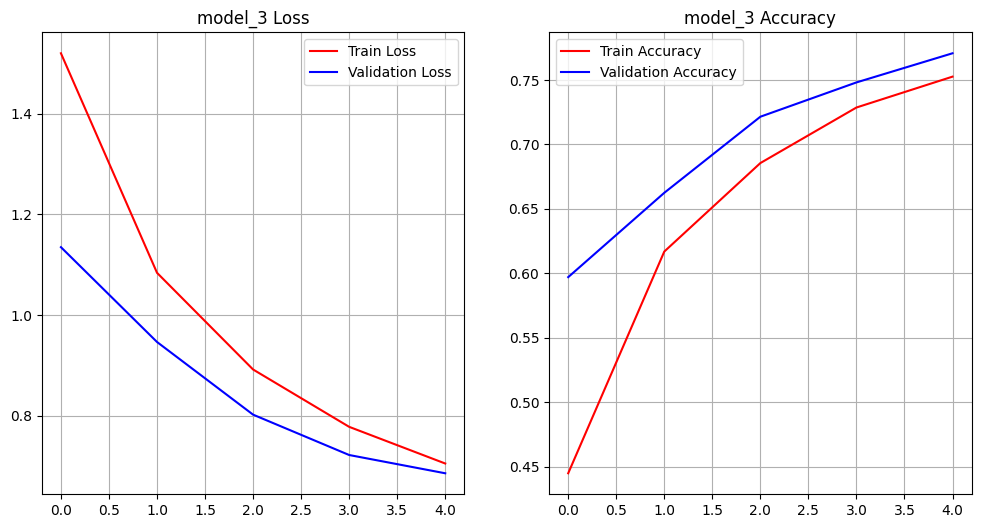

In [ ]:
# Plot training history

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history_3.history["loss"],'r', label="Train Loss")
ax.plot(history_3.history["val_loss"],'b', label="Validation Loss")
ax.legend()
ax.set_title('model_3 Loss')
ax.grid(True)

ax = fig.add_subplot(1, 2, 2)
ax.plot(history_3.history["accuracy"],'r', label="Train Accuracy")
ax.plot(history_3.history["val_accuracy"],'b', label="Validation Accuracy")
ax.legend()
ax.set_title('model_3 Accuracy')
ax.grid(True)

> The model I built started with a 3x3 convolutional layer instead of 5x5, in this way, the network will be able to capture more complex patterns with fewer parameters. I also experimented with doubling the filters for each deeper layers and this seemed to be an effective method. And while the runtime has increased further to **44mins**, the increase in accuracy is also more evident.

#### Conclusion

> In this activity, I experimented with different convolutional neural network architectures for the CIFAR-10 dataset. Model_2, featuring 3x3 convolutional layers and doubled filters, showed improved accuracy compared to Model_1. However, the trade-off was a significant increase in training time, raising questions about computational efficiency. Model_3 further refined the design by starting with a 3x3 convolutional layer, resulting in enhanced accuracy despite a longer training duration. Overall, these experiments highlight the importance of thoughtful architecture design, filter size selection, and parameter tuning to achieve optimal model performance while considering computational constraints.